# Home Assignment No. 3: Part 1 

In this part of the homework you are to solve several problems related to machine learning algorithms.
* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**.
* Your solution must me **COMPLETE**, i.e. contain all required formulas/proofs/detailed explanations.
* You must write your solution for any problem just right after the words **BEGIN SOLUTION**. Attaching pictures of your handwriting is allowed, but **highly discouraged**.
* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).
* To do some tasks in this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.
* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.
* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.
* The are problems with \* mark - they are not obligatory. You can get **EXTRA POINTS** for solving them.
## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


<br>

In [0]:
import numpy as np
import pandas as pd

import torch

%matplotlib inline
import matplotlib.pyplot as plt

<br>

# Bayesian Models. GLM

## Task 1 (1 pt.)

Consider a univariate Gaussian distribution $\mathcal{N}(x; \mu, \tau^{-1})$.
Let's define Gaussian-Gamma prior for parameters $(\mu, \tau)$:

\begin{equation}
    p(\mu, \tau)
        = \mathcal{N}(\mu; \mu_0, (\beta \tau)^{-1})
            \otimes \text{Gamma}(\tau; a, b)
        \,.
\end{equation}

Find the posterior distribution of $(\mu, \tau)$ after observing $X = (x_1, \dots, x_n)$.

**BEGIN Solution**

Materials:
- https://www.inf.ed.ac.uk/teaching/courses/mlpr/2016/notes/w2b_univariate_gaussian.pdf
- http://www.cs.cmu.edu/~aarti/Class/10601/homeworks/hw2Solutions.pdf

##### Solution

$$
p(\mu, \tau | x) = \dfrac{p(x | \mu, \tau) p(\mu, \tau)}{p(x)}
$$
Where, $ p(x | \mu, \tau) = \dfrac{1}{ (2\pi)^{\dfrac{n}{2}} det(\tau)^{\dfrac{1}{2}} } exp \left( -\dfrac{1}{2} (x - \mu)^\top \tau^{-1} (x - \mu) \right ) $ - likelihood function 

$ p(\mu, \tau) = \mathcal{N}(\mu; \mu_0, (\beta \tau)^{-1}) \otimes \text{Gamma}(\tau; a, b) $

$ p(x) = \mathcal{N}(x; \mu, \tau^{-1}) = C $

$$
p(x | \mu, \tau) = \prod_{i = 1}^{n} p(x_i | \mu, \tau) = \prod_{i = 1}^{n} \dfrac{1}{ (2\pi)^{\dfrac{n}{2}} det(\tau)^{\dfrac{1}{2}} } exp \left( -\dfrac{1}{2} (x_i - \mu)^\top \tau^{-1} (x_i - \mu) \right ) \\
log(p(x | \mu, \tau)) = \sum_{i = 1}^{n} log(p(x_i | \mu, \tau)) = \sum_{i = 1}^{n} log \left [ \dfrac{1}{ (2\pi)^{\dfrac{n}{2}} det(\tau)^{\dfrac{1}{2}} } exp \left( -\dfrac{1}{2} (x_i - \mu)^\top \tau^{-1} (x_i - \mu) \right ) \right ] = \\ = \sum_{i = 1}^{n} log \left [ \dfrac{1}{ (2\pi)^{\dfrac{n}{2}} det(\tau)^{\dfrac{1}{2}} } \right ] -\dfrac{1}{2} \sum_{i = 1}^{n} log \left [ (x_i - \mu)^\top \tau^{-1} (x_i - \mu) \right ] = \\ = -\sum_{i = 1}^{n} log \left [ (2 \pi)^{\dfrac{n}{2}} det(\tau)^{\dfrac{1}{2}} \right ] - \dfrac{1}{2} \sum_{i = 1}^{n} log \left [ (x_i - \mu)^\top \tau^{-1} (x_i - \mu) \right ] = \\ = -\dfrac{n^2}{2} log \left ( 2 \pi \right ) - \dfrac{n}{2} det(\tau) - \dfrac{1}{2} \sum_{i = 1}^{n} log \left [ (x_i - \mu)^\top \tau^{-1} (x_i - \mu) \right ] 
$$ 

$$
p(\mu, \tau | x) = \dfrac{ \left [ \prod_{i = 1}^{n} \dfrac{1}{ (2\pi)^{\dfrac{n}{2}} det(\tau)^{\dfrac{1}{2}} } exp \left( -\dfrac{1}{2} (x_i - \mu)^\top \tau^{-1} (x_i - \mu) \right ) \right ] \left [ \mathcal{N}(\mu; \mu_0, (\beta \tau)^{-1}) \otimes \text{Gamma}(\tau; a, b) \right ] }{ C }
$$

**END Solution**

<br>

## Task 2 (1 + 1 + 1 = 3 pt.)

Evaluate the following integral using the Laplace approximation:
\begin{equation}
    x \mapsto \int \sigma(w^T x) \mathcal{N}(w; 0, \Sigma) dw \,,
\end{equation}
for $x = \bigl(\tfrac23, \tfrac16, \tfrac16\bigr)\in \mathbb{R}^3$ and 
\begin{equation}
    \Sigma
        = \begin{pmatrix}
             1    & -0.25 & 0.75 \\
            -0.25 &  1    & 0.5  \\
             0.75 &  0.5  & 2
           \end{pmatrix}
        \,.
\end{equation}

### Task 2.1 (1 pt.)
Use the Hessian matrix computed numericaly via finite differences. (Check out [Numdifftools](https://pypi.python.org/pypi/Numdifftools))

In [0]:
import numdifftools as nd
from scipy.optimize import minimize
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
### BEGIN Solution

### END Solution

<br>

### Task 2.2 (1 pt.)
Use the diagonal approximation of the Hessian computed by autodifferentiation
in **pytorch**.

In [0]:
import torch
from torch.autograd import Variable, grad

In [0]:
### BEGIN Solution

### END Solution

<br>

### Task 2.3 (1 pt.)

Compare the results comparing the `absolute errors` of the results (this is possible with Monte-Carlo estimate of the integral). Write 1-2 sentences in the results discussion.

In [0]:
### BEGIN Solution

### END Solution

**BEGIN Solution**

**END Solution**

<br>

# Gaussian Processes

## Task 3 (1 + 2 = 3 pt.)

### Task 3.1 (1 pt.)

Assuimng the matrices $A \in \mathbb{R}^{n \times n}$ and $D \in \mathbb{R}^{d \times d}$
are invertible, using **gaussian elimination** find the inverse matrix for the following
block matrix:
\begin{equation}
    \begin{pmatrix} A & B \\ C & D \end{pmatrix} \,,
\end{equation}
where $C \in \mathbb{R}^{d \times n}$ and $B \in \mathbb{R}^{n \times d}$.

**BEGIN Solution**

$$
M = \left [
    \begin{array}{cc}
    A & B \\
    C & D \\
    \end{array}
\right ] \text{ find inverse matrix of } M \implies \\
\left [
    \begin{array}{cc|cc}
    A & B & E_n & 0 \\
    C & D & 0 & E_d \\
    \end{array}
\right ] = \left [
    \begin{array}{cc|cc}
    A^{-1} A & A^{-1} B & A^{-1} & 0 \\
    C        & D        & 0      & E_d \\
    \end{array}
\right ] =  \left [
    \begin{array}{cc|cc}
    A^{-1} A & A^{-1} B          & A^{-1}    & 0 \\
    0        & D - C A^{-1} B    & - C A^{-1} & E_d \\
    \end{array}
\right ] = \left \{ D - C A^{-1} B = K \right \} = \\ =
\left [
    \begin{array}{cc|cc}
    E_n & A^{-1} B & A^{-1}     & 0 \\
    0   & K        & - C A^{-1} & E \\
    \end{array}
\right ] = \left [
    \begin{array}{cc|cc}
    E_n & A^{-1} B & A^{-1}            & 0 \\
    0   & K^{-1} K & - K^{-1} C A^{-1} & K^{-1} \\
    \end{array}
\right ] = \\ = \left [
    \begin{array}{cc|cc}
    E_n & 0   & A^{-1} + A^{-1} B K^{-1} C A^{-1} & -A^{-1} B K^{-1} \\
    0   & E_d & - K^{-1} C A^{-1}                 & K^{-1} \\
    \end{array}
\right ] \implies M^{-1} = \left. \left [
    \begin{array}{cc}
    A^{-1} + A^{-1} B K^{-1} C A^{-1} & -A^{-1} B K^{-1} \\
    - K^{-1} C A^{-1}                 & K^{-1} \\
    \end{array}
\right ] \right|_{D - C A^{-1} B = K}
$$

<strong>Solution is may be similar with: https://math.stackexchange.com/questions/491237/inverse-of-a-certain-block-matrix<strong>

**END Solution**

<br>

### Task 3.2 (2 pt.)

Assume that the function $y(x)$, $x \in \mathbb{R}^d$, is a realization of the Gaussian
Process $GP\bigl(0; K(\cdot, \cdot)\bigr)$ with $K(a, b) = \exp({- \gamma \|a - b\|_2^2}))$.

Suppose two datasets were observed: **noiseless** ${D_0}$ and **noisy** ${D_1}$
\begin{aligned}
    & D_0 = \bigl(x_i, y(x_i) \bigr)_{i=1}^{n} \,, \\
    & D_1 = \bigl(x^\prime_i, y(x^\prime_i) + \varepsilon_i \bigr)_{i=1}^{m} \,,
\end{aligned}
where $\varepsilon_i \sim \text{ iid } \mathcal{N}(0, \sigma^2)$, independent of process $y$.

Derive the conditional distribution of $y(x) \big\vert_{D_0, D_1}$ at a new $x$.

**BEGIN Solution**

**END Solution**

<br>

## Task 4 (1 + 2 = 3 pt.)

### Task 4.1 (1 pt.)

> In the late 1950’s Charles Keeling invented an accurate way to measure atmospheric $CO_2$ concentration and began taking regular measurements at the Mauna Loa observatory.


Take `monthly_co2_mlo.csv` file, load it and prepare the data.

0. Load the `CO2 [ppm]` time series
1. Replace $-99.99$ with **NaN** and drop the missing observations
2. Split the time series into train and test
3. Normalize the target value by fitting a transformation on the train
4. Plot the resulting target against the time index

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

### BEGIN Solution

scaler = StandardScaler()

monthly = pd.read_csv('gdrive/My Drive/projects/machine-learning/Assignment 3/data/monthly_co2_mlo.csv')

monthly = monthly.replace(-99.99, np.nan)
monthly = monthly.dropna()
year, co_2 = monthly[['year']].values, monthly[['CO2 [ppm]']].values

year -= year[0]
X_train, X_test, y_train, y_test = train_test_split(year, co_2, shuffle=False)

scaler.fit(y_train)

y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

### END Solution

FileNotFoundError: ignored

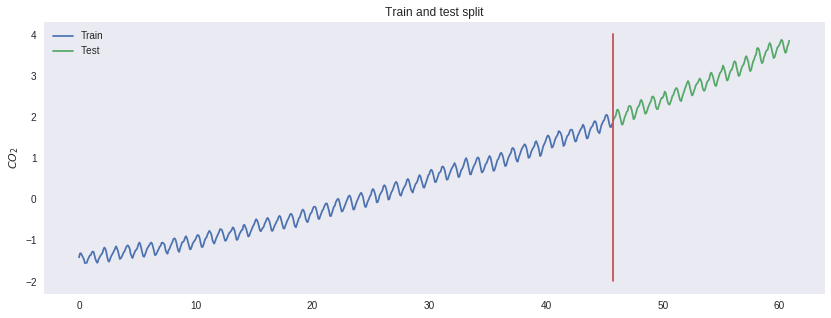

In [0]:
plt.figure(figsize=(14, 5))
plt.plot(X_train, y_train, label='Train')
plt.plot(X_test, y_test, label='Test')

plt.plot([X_test[0], X_test[0]], [-2, 4])
plt.title('Train and test split')
plt.ylabel(r'$ CO_2 $')
plt.legend()
plt.grid()

### Task 4.2 (2 pt.)

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

1. Plot mean and confidence interval of the prediction. 
2. Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
3. Estimate the prediction error with `r2_score`. R2-score accepted > 0.83 on test sample.

In [0]:
from GPy.models import GPRegression
from GPy.kern import RBF, Poly, StdPeriodic, White, Linear
from sklearn.metrics import r2_score

{'covariance': [<matplotlib.contour.QuadContourSet at 0x7f45ee093be0>]}

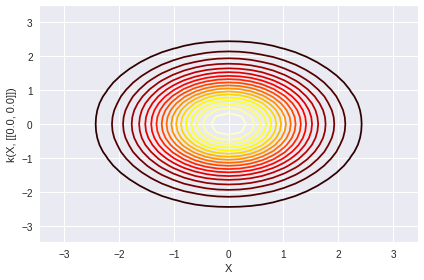

In [0]:
### BEGIN Solution

kg = RBF(input_dim=2, ARD = True)
White()
k = kg
k.plot()

# m = GPy.models.GPRegression(X,Y,k,normalize_Y=True)
# m.constrain_bounded('rbf_var',1e-3,1e5)
# m.constrain_bounded('bias_var',1e-3,1e5)
# m.constrain_bounded('rbf_len',.1,200.)
# m.constrain_fixed('noise',1e-5)
# m.randomize()
# m.optimize()
# m.plot()

### END Solution

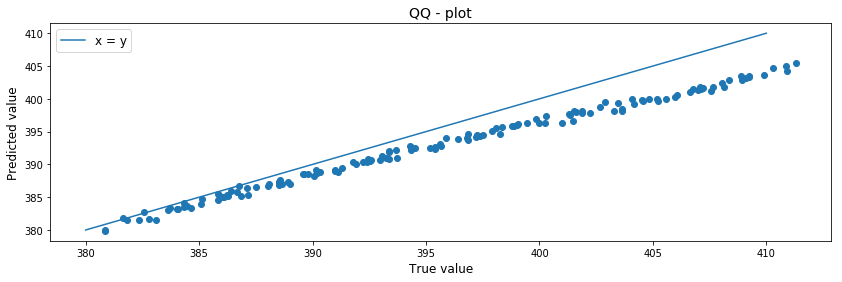

In [0]:
# >>> your code here <<<

In [0]:
r2_score(# >>> your code here <<<)

0.839219217819017